In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [32]:
# Cargamos el dataset
file_path = 'data_evaluacion_decoded.csv'
df = pd.read_csv(file_path)

# Mostramos las primeras filas del dataset
df.head()

,Unnamed: 0,edad,fnlwgt,educacion_num,estado_civil,relacion,ocupacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1


In [17]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,edad,fnlwgt,educacion_num,estado_civil,relacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo,salario
0,39,77516,13,1,1,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,2,0,0,0,40,0,1,1


<Axes: >

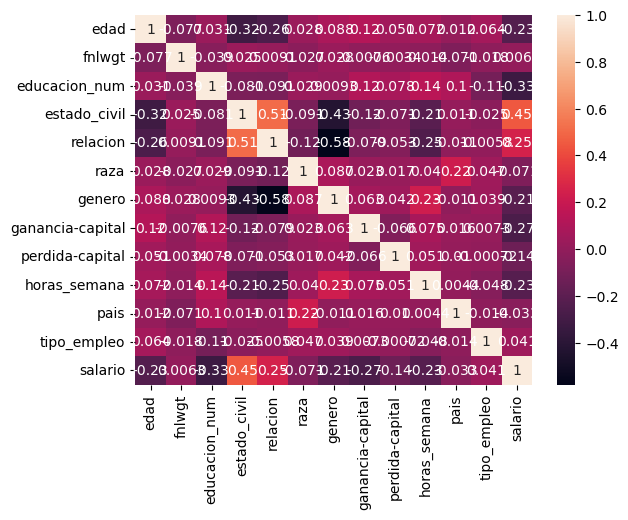

In [18]:
#Ver las relaciones de las etiquetas
sns.heatmap(df.corr(), annot=True)

In [19]:
x=df.drop(['salario'], axis=1)
x

,edad,fnlwgt,educacion_num,estado_civil,relacion,raza,genero,ganancia-capital,perdida-capital,horas_semana,pais,tipo_empleo
0,39,77516,13,1,1,4,1,1,0,40,1,0
1,50,83311,13,0,0,4,1,0,0,13,1,2
2,38,215646,9,1,1,4,1,0,0,40,1,1
3,53,234721,7,0,0,2,1,0,0,40,1,1
4,28,338409,13,0,5,2,0,0,0,40,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,1,1,4,0,0,0,36,1,1
48838,64,321403,9,1,2,2,1,0,0,40,1,3
48839,38,374983,13,0,0,4,1,0,0,50,1,1
48840,44,83891,13,1,3,1,1,1,0,40,1,1


In [20]:
y=df['salario']
y

0        1
1        1
2        1
3        1
4        1
        ..
48837    1
48838    1
48839    1
48840    1
48841    0
Name: salario, Length: 48842, dtype: int64

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [22]:
# Crear el escalador y ajustarlo solo con el conjunto de entrenamiento
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [23]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn_classifier.fit(x_train, y_train) # entrenamos

KNeighborsClassifier(metric='euclidean')

In [24]:
#Realizamos las predicciones
y_pred = knn_classifier.predict(x_test)

<Axes: xlabel='salario', ylabel='Count'>

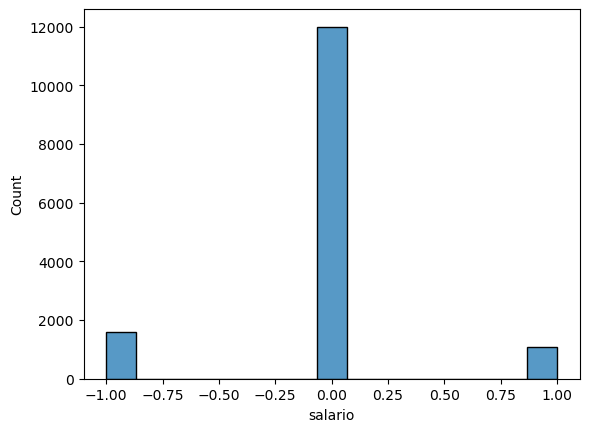

In [25]:
sns.histplot(y_test - y_pred)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Informe de clasificación
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Accuracy: 0.8186036989012488
Confusion Matrix:
[[ 1966  1578]
 [ 1080 10029]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.55      0.60      3544
           1       0.86      0.90      0.88     11109

    accuracy                           0.82     14653
   macro avg       0.75      0.73      0.74     14653
weighted avg       0.81      0.82      0.81     14653



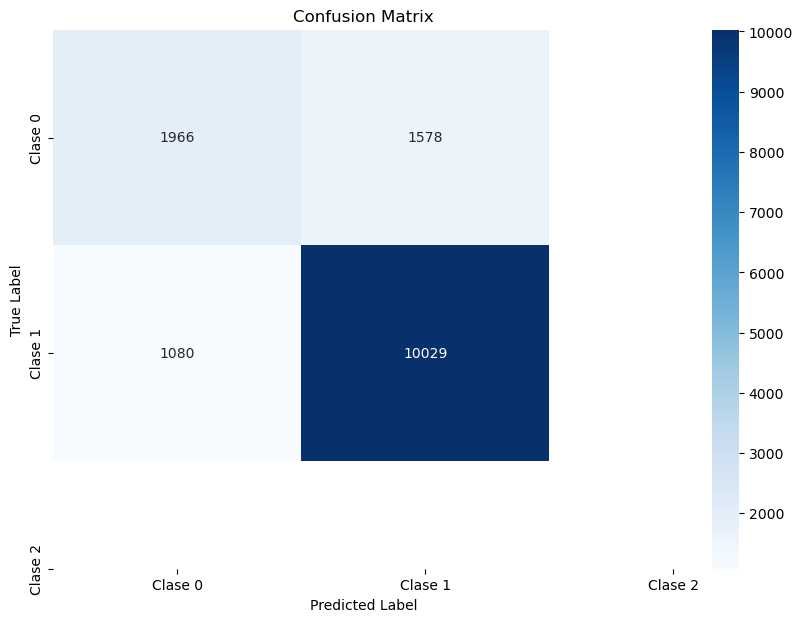

In [28]:
# Configurar la figura
plt.figure(figsize=(10, 7))

# Graficar la matriz de confusión con seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Clase 0', 'Clase 1', 'Clase 2'], 
            yticklabels=['Clase 0', 'Clase 1', 'Clase 2'])

# Añadir etiquetas y título
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Mostrar la gráfica
plt.show()

In [30]:
# Evalaucion del modelo
print('Train Accuracy : %.5f' % knn_classifier.score(x_train, y_train))
print('Test Accuracy : %.5f' % knn_classifier.score(x_test, y_test))
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Train Accuracy : 0.87394
Test Accuracy : 0.81860
Precisión del modelo: 0.8186036989012488
